Sveučilište u Zagrebu<br/>
Fakultet elektrotehnike i računarstva<br/>
Zavod za elektroničke sustave i obradbu informacija

Akademska školska godina 2021./2022.

**5. vježba: Dizajn IIR filtara**

*Osnove obradbe signala* (183447, 223374)

Autor: Tomislav Petković

Prijevod s engleskog jezika: Domagoj Zoraja

Datum: 2021-01-05

Molimo vas da komentare na ove upute (ispravke, primjedbe, prijedloge itd.) šaljete e-poštom na tomislav.petkovic.jr@fer.hr.

© Sveučilište u Zagrebu Fakultet elektrotehnike i računarstva, 2022.

Umnažanje i distribucija ovih uputa je dozvoljena samo ako svaka kopija sadrži gorenavedenu informaciju o autorskim pravima te ovu dozvolu o umnažanju.

# Uvod

Upute za petu laboratorijsku vježbu iz predmeta *Osnove obradbe signala* su pripremljene u obliku <a href="https://jupyter.org/">Jupyterske</a> bilježnice.

Jupyterska bilježnica koristi <a href="https://ipython.org/">IPython</a> koji je interaktivni interpreter za Pyhton. Jupytersku bilježnicu možete pokrenuti lokalno, no isto tako je možete pokrenuti udaljeno na Googleovom Colaboratoryu.

Svi zadaci u ovoj bilježnici su dovoljno jednostavni tako da se mogu riješiti korištenjem <a href="https://colab.research.google.com">Googleovog Colaboratorya</a> (skraćeno Colab).

Svaki softver je samo alat. Sukaldno tome, osim Pythona slobodno smijete koristiti i druge alate kao što su <a href="https://www.mathworks.com/products/matlab.html">Matlab</a>, <a href="https://www.gnu.org/software/octave/index">GNU Octave</a> i <a href="https://www.scilab.org/">Scilab</a> kako bi riješili zadane zadatke. Napominjemo da korištenje drugih alata može značiti da vaš izvještaj s vježbe ne možete predati popunjavanjem ove bilježnice, odnosno da morate pripremiti novi pisani izvještaj. Dodatno, nastavnici vam mogu pomoći oko izrade vježbe samo ako koristite Colab i/ili Matlab.

## Upute za predaju izvještaja s vježbe

Ako rješavate vježbu u Pythonu korištenjem Colaba onda jednostavn upišite vaše odgovore u prazna polja, i to programski kod u polja za kod te odgovore na postavljena pitanja u tekstualna polja.

Prazna polja u koja upisujete programski kod sadrže zadani komentar: `# Upišite vaše rješenje`.

Tekstualna polja u koja morate upisati odgovore na postavljena pitanja sadrže masni tekst napisan velikim tiskanim slovima: **UPIŠITE VAŠ ODGOVOR**.

Jednom kada su svi zadaci riješeni ispunjenu bilježnicu pohranite u datoteku s imenom `JMBAG_IME_PREZIME.ipynb` i predajte je e-poštom na tomislav.petkovic.jr@fer.hr uz `[OOS] 5. vježba` kao naslov poruke.

Predane bilježnice mogu biti automatski re-evaluirane što odgovara naredbi  *Restart and run all* u Colabu. Prema tome, svakako prije predaje vaše bilježnice pokrenite tu naredbu i provjerite ispravnost vaših rješenja.

Ako ste vježbu izradili korištenjem nekog drugog softvera koji nije kompatibilan s Jupyterskom bilježnicom onda morate pripremiti standardni pisani izvještaj s laboratorijske vježbe.

## Podaci o studentu

Molimo vas da prije ispunjavanja ostatka bilježnice dvaput kliknete na ovaj tekst te zatim upište vaše podatke:

Ime: **SVEN SKENDER**

Matični broj (JMBAG): **0036507654**

Također odmah promijenite ime datoteke u JMBAG_IME_PREZIME.ipynb.

## Uvoz potrebnih funkcija

Radi smanjivanja razlika između programskog koda u Pythonu i u Matlabu u ovoj bilježnici ćemo namjerno uvesti sve potrebne funkcije iz <a href="https://www.scipy.org/">SciPy</a>-ja, <a href="https://numpy.org/">NumPy</a>-ja i <a href="https://matplotlib.org/">Matplotlib</a>-a izravno u globalni imenik tako da možemo jednostavno pisati `fft` umjesto punog imena `scipy.fft.fft`.

Svakako imajte u vidu da je ovakav pristup uvjetno prihvatljiv radi pojednostavljenja koda za laboratorijske vježbe jer su rizici kolizije i neočekivanih nuspojava minimalni. **Uvoz funkcija u globalni imenik se ne koristi u produkcijskom kodu.**

Ako preferirate korištenje imenika i punih imena funkcija onda slobodno izmijenite naredbe za uvoz funkcija tako da sve uvezene funkcije ostanu strogo razdvojene.

In [1]:
# Uvezi potrebne funkcije u globalni imenik
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import *
from scipy.fft import *

# 1. Dizajn IIR filtara

U ovoj laboratorijskoj vježbi istražujemo kako uz pomoć računala možemo odrediti koeficijente prijenosne funkcije digitalnog filtra koje zadovoljavaju zadanu filtarsku specifikaciju. Tu zadaću pronalaženja filtarskih koeficijenata nazivamo računalnom podržani dizajn filtara. 

Glavni problem kod dizajniranja filtra jest određivanje koeficijenata prijenosne funkcije

$$H(z)={B(z)\over A(z)}={\strut\displaystyle\sum_{j=0}^{M}b_jz^{-j}\over\strut\displaystyle1+\sum_{i=1}^{N}a_iz^{-i}}={b_0+b_1z^{-1}+b_2z^{-2}+\cdots+b_{M}z^{-M}\over1+a_1z^{-1}+a_2z^{-2}+\cdots+a_Nz^{-N}}$$

takvih da frekvencijska karakteristika filtra $H(e^{j\omega})$ dobro aproksimira neku željenu frekvecnijsku karakteristiku $D(\omega)$.

Dodatno ograničenje kojeg prijenosna funkcija mora zadovoljiti jest da se njeni svi polovi $p_k$, $k=1,\ldots,N$ (koji su nultočke polinoma $A(z)$ u nazivniku) moraju nalaziti unutar jednične kružnice, dakle mora vrijediti $|p_k|<1, k=1,\ldots,N$, odnosno filtar mora biti stabilan.

Drugim riječima rečeno, prijenosna funkcija $H(z)$ digitalnog filtra kojeg dizajniramo nije proizvoljna funkcija; ona mora biti **ostvariva** što znači da $H(z)$ mora opisivati linearan i vremenski nepromjenjiv (LTI) sustav koji je i **kauzalan** i **stabilan**.

Kauzalnost sustava je osigurana odabranim oblikom prijenosne funkcije $H(z)$ gdje su svi eksponenti varijable $z$ negativni. Prisjetite se da ne-pozitivne potencije od $z$ odgovaraju trenutnim ili zakašnjelim uzorcima ulaznog ili izlaznog signala u diferencijskoj jednadžbi koja opisuju filtar, pa je to nužni uvjet kojeg moramo ispuniti za kauzalnost.

Uvjet za stabilnost sustava se nažalost ne može izravno iskazati preko koeficijenata prijenosne funckije $a_i$ jer se nultočke polinoma četvrtog ili višeg reda/stupnja ne mogu izraziti u radikalima. Prema tome stabilnost sustava se mora ili provjeravati neizravno ili se prijenosna funkcija mora iskazati preko svojih nula, polova i pojačanja (engl. *zero-pole-gain*, još se koristi i kratica ZPK gdje K označava konstantu koja definira pojačanje).

U ovoj laboratorijskoj vježbi proučavamo kako dizajnirati IIR filtre.

Kod IIR filtara i brojnik i nazivnik prijenosne funkcije nisu trivijalni (što je značajna razlika u odnosnu na FIR filtre za koje je $A(z)=1$).

Poseban slučaj IIR filtara su filtri **samo s polovima**, odnosno filtri kojima je brojnik $B(z)=1$; nule takvih filtara su trivijalne.

Primjenom inverzne Z-transformacije na prijenosnu funkciju $H(z)$ dobivamo impulsni odziv filtra $h[n]$ što u slučaju IIR filtara nije jednostavan zadatak. U praksi prijenosnu funkciju $H(z)$ obično rastavljamo na parcijalne razlomke pri čemu broj polova prijenosne funckije i njihova kratnost određuje broj parcijalnih razlomaka i njihov oblik.

Impulsni odziv IIR filtera je kauzalan (odnosno $h[n]=0$ za $n<0$) i beskonačnog je trajanja što znači da je gotovo uvijek različit od nule za korake od $n=0$ do $n=+\infty$. Obzirom na uvjet stabilnosti očekujemo da impulsni odziv teži k nuli kako $n\to+\infty$.

Impulsni odziv $h[n]$ IIR filtera je dakle **beskonačnog** trajanja počevši od $n=0$ prema $+\infty$, i po tome je filtar dobio naziv filtar s beskonačnim impulsnim odzivom ili **IIR** filtar. Kratica IIR dolazi od engl. **I**nfinite **I**mpulse **R**esponse. Naglašavamo da se pojam beskonačno odnosni na trajanje impuslnog odziva, a ne na njegovu amplitudu.

Druga kratica za IIR filtar je **ARMA** filtar, od engl. **A**uto-***R**egressive **M**oving **A**verage, jer se postupak filtracije efektivno svodi na težinsko usrednjavanje zadnjih $N$ uzoraka izlaznog signala, što je auto-regresija ili AR dio, i zadnjih $M$ uzoraka ulaznog signala, što je pomično usrednjavanje ili MA dio. Primijetite da su AR filtri oni filtri koji imaju **samo polove**, a MA filtri su oni filtri koji imaju **samo nule**.

## 1.1. Zadaća dizajniranja IIR filtra

U zadaći dizajniranja digitalnog filtra gotovo uvijek započinjemo s zadanom **željenom frekvencijskom karakteristikom** $D(\omega)$.

Zadaća dizajniranja IIR filtra se svodi na određivanje koeficijenata $a_n$, $n=1,\ldots, N$, i $b_n$, $n=1,\ldots,M$ prijenosne funckije $H(z)$ takvih da frekvencijska karakteristika LTI sustava

$$H(e^{j\omega})={B(e^{j\omega})\over A(e^{j\omega})}={\strut\displaystyle\sum_{m=0}^{M}b_me^{-jm\omega}\over\strut\displaystyle\sum_{n=0}^{N}a_ne^{-n\omega}}={\strut\displaystyle b_0+b_1e^{-j\omega}+b_2e^{-2j\omega}+\cdots+b_{M}e^{-jM\omega}\over\strut\displaystyle\strut a_0+a_1e^{-j\omega}+a_2e^{-2j\omega}+\cdots+a_{N}e^{-jN\omega}}$$

bude **dovoljno dobra aproksimacija** željene frekvencijske karakteristike $D(\omega)$.

Opisanu zadaću rješavamo uvođenjem funkcije greške (koju još nazivamo i funkcija cijene ili funkcija udaljenosti) koja mjeri kvalitetu našeg rješenja. Uvođenjem funkcije greške zadaću dizajna filtra pretvaramo u klasičan minimizacijski problem. 

Standradna funkcija greške koja se koristi za dizajniranje filtara jest **p**-norma razlike $D(\omega)$ i $H(e^{j\omega})$, odnosno želimo minimizirati **pravu** ili izlaznu grešku

$$E_S=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_p=\sqrt[p]{\int_{-\pi}^{+\pi}\bigl|D(\omega)-H(e^{j\omega})\bigr|^p\,d\omega}=\sqrt[p]{\int_{-\pi}^{+\pi}\biggl|D(\omega)-{B(e^{j\omega})\over A(e^{j\omega})}\biggr|^p\,d\omega}.$$

U navedenom izrazu za grešku $E$ poznati parametri su željena frekvencijska karakteristika $D(\omega)$ i parametar $p$ koji određuje normu. Nepoznati parametri su red brojnika $M$, red nazivnika $N$ te koeficijenti $a_n$, $n=1,\ldots,N$ i $b_m$, $m=1,\ldots,M$ koje moramo odrediti.

Minimizacija greške $E_S$ je teška jer dijeljenje s $A(e^{j\omega})$ čini minimizacijski problem nelinearnim obzirom na koeficijente $a_n$ i $b_m$. Minimizacijski problem dodatno otežava činjenica da uvjet stabilnost ne možemo iskazati preko ograničenja na koeficijente nazivnika $a_n$. Zbog toga je minimizacijski problem puno prikladnije rješavati korištenjem ZPK reprezentacije, odnosno prijenosnu funkciju iskazujemo preko nula, polova i pojačanja tako da minimiziramo

$$E_S=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_p=\sqrt[p]{\int_{-\pi}^{+\pi}\bigl|D(\omega)-H(e^{j\omega})\bigr|^p\,d\omega}=\sqrt[p]{\int_{-\pi}^{+\pi}\biggl|D(\omega)-K{\sum_{m=1}^M(1-q_me^{-j\omega})\over\sum_{n=1}^N(1-p_ne^{-j\omega})}\biggr|^p\,d\omega},$$

uz ograničenja $|p_n|<1$. U ovakvoj formulaciji minimizacijskog problema samo polovica nula i polova su nepoznanice koje određujemo minimizacijom; preostala polovica je određena time da mora tvoriti konjugirano-kompleksne parove.

Zbog intraktabilnosti minimizacije prave ili izlazne greške $p$-normu razlike između $D(\omega)$ i $H(e^{j\omega})$ često zamjenjujemo s takozvanom **algebarskom greškom** ili **greškom jednadžbe** koju definiramo kao

$$E_E=\bigl|\bigl|D(\omega)A(e^{j\omega})-B(e^{j\omega})\bigr|\bigr|_p=\sqrt[p]{\int_{-\pi}^{+\pi}\bigl|D(\omega)A(e^{j\omega})-B(e^{j\omega})\bigr|^p\,d\omega},$$

i koja za $P=2$ daje linearni problem obzirom na koeficijente $a_n$ i $b_m$. Prema tome za $p=2$ algebarska greška se pretvara u skalarni produkt,

\begin{align}
E_E^2=\bigl|\bigl|D(\omega)A(e^{j\omega})-B(e^{j\omega})\bigr|\bigr|_2^2&=\int_{-\pi}^{+\pi}\bigl|D(\omega)A(e^{j\omega})-B(e^{j\omega})\bigr|^2\,d\omega\\
&=\Bigl\langle D(\omega)A(e^{j\omega})-B(e^{j\omega}),D(\omega)A(e^{j\omega})-B(e^{j\omega})\Bigr\rangle
\end{align},

i to je problem kojeg znamo riješiti ako zanemarimo ograničenje stabilnosti filtra.

U Matlabu možemo jednostavno dizajnirati filtar korištenjem kriterija minimizacije algebarske funckije pogreške korištenjem funkcije [`invfreqz`](https://www.mathworks.com/help/signal/ref/invfreqz.html). Nažalost, ta funkcija još nije implementirana u ScyPyju pa takav računalno potpomognuti dizajn nećemo razmatrati u ovoj vježbi.

## 1.2 Dizajniranje amplitudno-selektivnih IIR filtara

Primjena optimizacijskih postupaka u procesu dizajniranja filtara osigurava maksimalnu fleksibilnost dizajna, odnosno možemo zadati proizvoljni $D(\omega)$ kao željenu frekvencijsku karakterisitku. Glavni nedostatak primjene optimizacijskih postupaka jest u tome da ih moramo rješavati pomoću računala, a to je ujedno i razlog zašto se takav pristup ne koristi u takozvanom klasičnom dizajniranju filtara.

Kod klasičnog dizajna filtara (i digitalnih i analognih) postupak dizajniranja se razdvaja u dva koraka: (1) dizajniranje amplitudno-selektivnog filtra, i (2) dizajniranje faznog korektora.

Takvo razdvajanje dizajna u dva odvojena koraka se temelji na činjenici da svaku prijenosnu funkciju stabilnog i kauzalnog filtra možemo jednoznačno rastaviti na kaskadu (produkt prijenosnih funkcija) **minimalno-faznog filtra** (engl. *minimum- phase filter*) i **svepropusnog filtra** (engl. *all-pass filter*), odnosno

$$H(z)=H_{MP}(z)H_{A}(z).$$

Minimalno-fazni filtar $H_{MP}(z)$ je određen time da su svi njegovi polovi i sve njegove nule unutar jedinične kružnice. Osim toga, amplituda i faza prijenosne funkcije $H_{MP}(e^{j\omega})$ su povezani [Hilbertovom transformacijom](https://ccrma.stanford.edu/~jos/sasp/Minimum_Phase_Filter_Design.html), odnosno ako je zadana amplitudna karakteristika $|H(e^{j\omega})|$ onda iz nje možemo jednoznačno odrediti faznu karakteristiku $\angle H(e^{j\omega})$, i obrnuto.

Svepropusni filtar $H_{MP}(z)$ je određen time da ne utječe na amplitudni spektar signala, odnosno za njega vrijedi $|H_{MP}(e^{j\omega})|=1$, dok fazna karakteristika ovisi isključivo o položajima nula izvan jedinične kružnice. Prema tome svepropusni filtar utječe samo na fazu signala.

Ova mogućnost rastava prijenosne funkcije znali da bilo koji IIR filtar možemo prikazati preko minimalno-faznog dijela koji u potpunosti određuje amplitudnu karakteristiku filtra, te preko svepropusnog dijela koji dodatno određuje faznu karakteristiku.

U ovoj laboratorijskoj vježbe ćemo razmatrati samo prvi korak klasičnog postupka dizajniranja digitalnih filtara: dizajniranje amlitudno-selektivnog minimalno-faznog filtra.

## 1.3. Četiri tipa amplitudno-selektivnih filtara

Kod dizajniranja amplitudno-selektivnih minimalno-faznih filtara zadajemo samo **amplitudnu karakteristiku** (ili amplitudno-frekvencijsku karakterisitku)

$$A_D(\omega)=\bigl|D(\omega)\bigr|.$$

Fazno-frekvencijsku karakteristiku ne zadajemo.

Uobičajeno definiramo četiri tipa amplitudno-selektivih filtara obzirom na oblik željene **amplitudne karakteristike**:

1. nisko-propusni ili NP filtar,
2. visoko-propusni ili VP filtar,
3. pojasno-propusni ili PP filtar, i
4. pojasnu branu (PB).

Odgovarajuće kratice u engleskom jeziku su LP za nisko-propusni filtar, od engl. *low-pass*, HP za visoko-propusni filtar, od engl. *high-pass*, BP za pojasno-propusni filtar, od engl. *band-pass*, i BS za pojasnu branu, od engl. *band-stop*.

**Nisko-propusni** filtar propušta frekvencije manje od granične frekvencije $\omega_c$. Frekvencije od $0$ d $\omega_c$ su propuštene zbog čega se raspon frekvencija $[0,\omega_c\rangle$ naziva **područjem propuštanja**. Frekvencije of $\omega_c$ do $\pi$ su ugušene (zaustavljene) zbog čega se to frekvencijsko područje $\langle \omega_c,\pi\rangle$ naziva **područjem gušenja**. Ostvarivi (realizabilni) filtri ne mogu imati beskonačno strm prijelaz iz područja propuštanja u područje gušenja pa zbog toga uvijek postoji neko **prijelazno područje** oko granične frekvencije $\omega_c$.

**Visoko-propusni** filtar guši frekvencije manje od granične frekvencije $\omega_c$. U odnosu na nisko-propusni filtar iste granične frekvencije kod visoko-propusnog filtra područje propuštanja i područje gušenja su zamijenjeni.

**Pojasno-propusni** filtar propušta samo frekvencije unutar odabranog frekvencijskog pojasa $\langle\omega_L,\omega_H\rangle$.

**Pojasni brana** gušiti sve frekvencije unutar odabranog frekvencijskog pojasa $\langle\omega_L,\omega_H\rangle$. Pojasne brane s uskim područjem gušenja zovemo **zapornim** filtrima (engl. *notch filter*); digitalni zaporni filtri najčešće imaju jednu ili više nula na jediničnoj kružnici točno unutar njihovog uskog pojasa gušenja.

Ostali tipove filtara koji ne odgovaraju nekom od standardna četiri tipa amplitudno-selektivnih filtara možemo dizajnirati klasičnim postupkom samo ako se njihova amplitudna karakteristika može iskazati kao kombinacija standardnih NP, VP, PP i PB filtara, bilo kao njihov paralelni spoj (zbroj prijenosnih funkcija) bilo kao njihov kaskadni spoj (produkt prijenosnih funkcija).

## 1.4. Četiri filtarske aproksimacije

Kod klasičnog dizajniranja filtara svaki od četiri tipa amplitudno-selektivnih filtara može se ostvariti pomoću neke od četiri filtarske aproksimacije koje se razlikuju oblikom ostvarene karakteristike u području propuštanja i u području gušenja. Četiri tipa filtarskih aproksimacija su:

1. Butterworthova aproksiamcija,
2. Čebišovljeva aproksimacija prve vrste (tip I),
3. Čebišovljeva aproksimacija druge vrste (tip II, i
4. Cauerova (ili eliptička) aproksimacija.

Butterworthova aproksimacija je **maksimalno glatka** u oba područja (dakle radi se o glatkoj neprekinutoj aproksimaciji).

Dvije Čebišovljeve aproksimacije imaju **jednoliku valovitost** u jednom od dva područja: aproksimacija prve vrste (tip I) ima jednoliku valovitost u području propuštanja, a aproksimacija druge vrste (tip II) ima jednoliku valovitost u području gušenja.

Cauerova (ili eliptička) aproksimacija ima **jednoliku valovitost** u oba područja, dakle i u području propuštanja i u području gušenja.

U praksi aproksimacije **jednolike valovitosti** će zadovoljiti zadanu filtarsku specifikaciju s nižim redom filtra u odnosnu na red filtra koji je potreban za **maksimalno glatku** aproksimaciju. Glavni nedostatak aproksimacija koje su **jednoliko valovite** jest da određene primjene ne dozvoljavaju takvu valovitost.

Do svake od navedene četiri aproksimacije se jednostavno dolazi korištenjem računala.

Funkcije za klasičnih dizajn filtara su iste i u ScyPyju i u Matlabu. Za dizajniranje bilo koje od navedene četiri aprokimacije koriste se dvije fukncije: prvu koja procjenjuje najniži potrebni red filtra, i drugu koja računa filtarske koeficijente. Imena tih funkcija su:

1. za Butterworthovu aproksimaciju: `buttord` i `butter`;
2. za Čebišovljevu aproksimaciju prve vrste (tip I): `cheb1ord` i `cheby1`;
2. za Čebišovljevu aproksimaciju druge vrste (tip II): `cheb2ord` i `cheby2`; i
2. za Cauerovu (ili eliptičku) aproksimaciju: `ellipord` i `ellip`;

Dokumantacija za svih osam funkcija za ScyPy je dostupna na Internetu: [`scipy.signal.buttord`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html), [`scipy.signal.butter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html), [`scipy.signal.cheb1ord`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheb1ord.html), [`scipy.signal.cheby1`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html), [`scipy.signal.cheb2ord`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheb2ord.html), [`scipy.signal.cheby2`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html), [`scipy.signal.ellipord`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipord.html) i [`scipy.signal.ellip`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html). Preporučamo vam da svakako pročitate dokumentaciju svake funkcije prije nego je koristite u ovoj laboratorijskoj vježbi.

Dokumantacija za Matlab: [`buttord`](https://www.mathworks.com/help/signal/ref/buttord.html), [`butter`](https://www.mathworks.com/help/signal/ref/butter.html), [`cheb1ord`](https://www.mathworks.com/help/signal/ref/cheb1ord.html), [`cheby1`](https://www.mathworks.com/help/signal/ref/cheby1.html), [`cheb2ord`](https://www.mathworks.com/help/signal/ref/cheb2ord.html), [`cheby2`](https://www.mathworks.com/help/signal/ref/cheby2.html), [`ellipord`](https://www.mathworks.com/help/signal/ref/ellipord.html) i [`ellip`](https://www.mathworks.com/help/signal/ref/ellip.html).


Uz zadanu specifikaciju amplitudne karakteristike zadaća dizajna filtra se uobičajeno rješava u sljedećim koracima:

1. procjeni potreban red filtra $N$ (primijeti da je $N=M$);
2. za odabrani red filtra $N$ odredi filtarske koeficijente $a_n$ i $b_n$, $n=0,\ldots,N$;
3. provjeri zadovoljava li dobivena $H(e^{j\omega})$ zadanu specifikaciju filtra; i
4. Ako je filtarska specifikacija zadovoljena onda je filtar uspješno dizajniran, u suprotnom povećaj red filtra $N$ i vrati se na drugi korak.

Pokažimo sada primjerom kako se dizajnira nisko-propusni filtra. Započinjenmo s definiranjem i crtanjem amplitudne karakteristike:

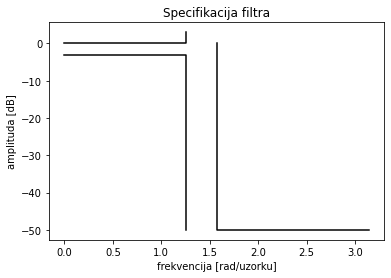

In [2]:
# Područje propuštanja zadajemo normaliziranom graničnom frekvencijom Wp i navjećim dozvoljenim gubitkom Rp u dB
Wp = 0.4;
Rp = 3;

# Područje gušenja zadajemo normaliziranom graničnom frekvencijom Ws i najmanjim dozvoljenim gušenjem Rs u dB
Ws = 0.5;
Rs = 50;

# Pomoćna funkcija za crtanje amplitudne specifikacije
def oos_NP_spec(Wp, Ws, Rp, Rs):
  plot([0, Wp*pi, Wp*pi], [0, 0, Rp], 'k'); # Gornja ograda u području propuštanja
  plot([0, Wp*pi, Wp*pi], [-Rp, -Rp, -Rs], 'k'); # Donja ograda u području propuštanja
  plot([Ws*pi, Ws*pi, pi], [0, -Rs, -Rs], 'k'); # Gornja ograda u području gušenja

# Nacrtaj amplitudnu specifikaciju kao horizontalne i vertikalne ograde 
figure(1);
oos_NP_spec(Wp, Ws, Rp, Rs);
title('Specifikacija filtra');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda [dB]');

Prvo, uočite da u zadanoj specifikaciji definiramo jedno područje propuštanja od `0` do `Wp`, jedno prijelazno područje između `Wp` i `Ws`, i jedno područje gušenja od `Ws` do `pi`.

Zatim uočite kako u filtarskoj specifikacija moramo zadati najveći dozvoljeni gubitak u području propuštanja. Željena vrijednost amplitudne karakteristike u području propuštanja jest 0 dB. Ako definiramo dozvoljeni gubitak od 1 dB time zadajemo ograničenje na amplitudnu karakteristiku koja u području propuštanja mora biti između 0 dB i -1 dB. Strogo gledano ovakva specifikacija je različita od specifikacije valovitosti koju smo koristili kod dizajniranja FIR filtara (prethodna vježba): za `firpm` smo zadavali željenu vrijednost amplitude (tipično 0 dB) i zatim smo valovitost definirali simetrično oko željene amplitude što nije isto kao definiranje valovitosti u samo jednom smjeru.

U području gušenja zadajemo samo najmanje gušenje od 50 dB, a željena amplituda je potpuno gušenje što odgovara negativnoj beskonačnosti u dB. Takav način zadavanja specifikacije je u osnovi isti kao i kod FIR filtara (prethodna vježba) gdje je željena amplituda potpuno gušenje signala i gdje je valovitost simetrična oko nje.

Sada iz zadane specifikacije filtra možemo dizajnirati svaku od četiri aproksimacije:


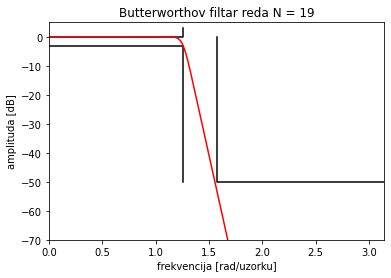

In [3]:
# Pomoćna funkcija za crtanje amplitudnih odziva i definiranje osi tako da su sve slike međusobno usporedive
def oos_amp_karak(B, A):
  oos_NP_spec(Wp, Ws, Rp, Rs);
  W, H = freqz(B, A);
  plot(W, 20*log10(abs(H)), 'r');
  xlabel('frekvencija [rad/uzorku]');
  ylabel('amplituda [dB]');
  axis([0, pi, -70, 5]);


# Dizajn filtra korištenjem Butterworthove aproksimacije
N_b, Wn_b = buttord(Wp, Ws, Rp, Rs);
B_b, A_b = butter(N_b, Wn_b);

# Nacrtaj amplitudnu karakterisitku
oos_amp_karak(B_b, A_b);
title('Butterworthov filtar reda N = ' + str(N_b));

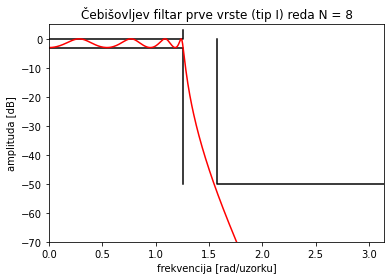

In [4]:
# Dizajn filtra korištenjem Čebišovljeve aproksimacije prve vrste (tip I)
N_c1, Wn_c1 = cheb1ord(Wp, Ws, Rp, Rs);
B_c1, A_c1 = cheby1(N_c1, Rp, Wn_c1);

# Nacrtaj amplitudnu karakterisitku
oos_amp_karak(B_c1, A_c1);
title('Čebišovljev filtar prve vrste (tip I) reda N = ' + str(N_c1));

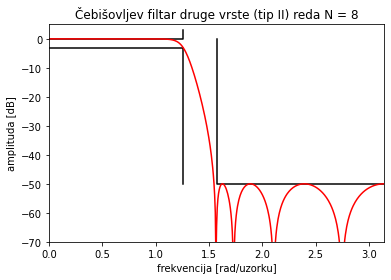

In [5]:
# Dizajn filtra korištenjem Čebišovljeve aproksimacije druge vrste (tip II)
N_c2, Wn_c2 = cheb2ord(Wp, Ws, Rp, Rs);
B_c2, A_c2 = cheby2(N_c2, Rs, Wn_c2);

# Nacrtaj amplitudnu karakterisitku
oos_amp_karak(B_c2, A_c2);
title('Čebišovljev filtar druge vrste (tip II) reda N = ' + str(N_c2));

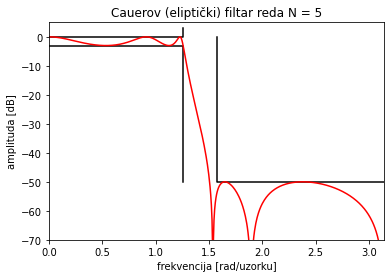

In [6]:
# Dizajn filtra korištenjem Cauerove (eliptičke) aproksimacije
N_e, Wn_e = ellipord(Wp, Ws, Rp, Rs);
B_e, A_e = ellip(N_e, Rp, Rs, Wn_e);

# Nacrtaj amplitudnu karakterisitku
oos_amp_karak(B_e, A_e);
title('Cauerov (eliptički) filtar reda N = ' + str(N_e));

Uočite razlike u ostvarenim amplitudnim karakteristikama u području propuštanja u i području gušenja za različite aproksimacije koje smo koristili (primarno maksimalno glatka aproksimacija nasuprot jednoliko valovitoj aproksimaciji).

Također uočite koji red filtra je potreban da se zadovolji ista polazna filtarska specifikcaija.

## 1.5. Grupno kašnjenje i fazna izobličenja

Minimalno-fazni amplitudno-selektivni filtar dizajniramo samo prema amplitudnoj specifikaciji, odnosno uopće ne razmatramo što se događa s fazom. 

Želimo li u potpunosti izbjeći **fazna izobličenja** (engl. *phase distortions*) moramo ostvariti **linearnu** fazu. Međutim, kako uopće nismo dizajnirali faznu karakteristiku i kako osim toga potpuno linearnu faznu karakteristiku uopće nije moguće ostvariti korištenjem IIR filtara, očekujemo da će dizajnirani filtar uzrokovati fazna izobličenja.

Dobar indikator faznih izobličenja jest **grupno vrijeme kašnjenja** $\tau$ koje definirano kao negativnu derivaciju faze, odnosno

$$\tau=-{d\over d\omega} \angle H(e^{j\omega}).$$

Idealno grupno vrijeme kašnjenje za filtre savršeno linearne faze je konstantno. Za dizajnirani IIR filtar stoga želimo da grupno vrijeme kašnjenje u području propuštanja bude što bliže konstanti. Grupno kašnjenje u području gušenja nas ne zanima jer se te frekvencije uklanjaju iz signala.


U ScyPyju grupno kašnjenje određujemo korištenjem funkcije [`scipy.signal.group_delay`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.group_delay.html). Odgovarajuća funkcija za grupno kašnjenje u Matlabu je [`grpdelay`](https://www.mathworks.com/help/signal/ref/grpdelay.html).

Odredimo i nacrtajmo grupno vrijeme kašnjenja za četiri dizajnirana IIR filtra:

/Users/svenskender/Library/Python/3.8/lib/python/site-packages/scipy/signal/filter_design.py:689: UserWarning: The group delay is singular at frequencies [2.859, 2.865, 2.872, 2.878, 2.884, 2.890, 2.896, 2.902, 2.908, 2.915, 2.921, 2.927, 2.933, 2.939, 2.945, 2.951, 2.958, 2.964, 2.970, 2.976, 2.982, 2.988, 2.994, 3.000, 3.007, 3.013, 3.019, 3.025, 3.031, 3.037, 3.043, 3.050, 3.056, 3.062, 3.068, 3.074, 3.080, 3.086, 3.093, 3.099, 3.105, 3.111, 3.117, 3.123, 3.129, 3.135], setting to 0
  warnings.warn(


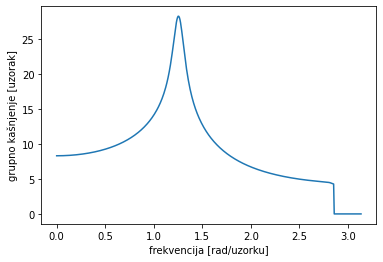

In [7]:
# Definiraj funkciju za crtanje grupnog vremena kašnjenja tako da sve slike izgledaju isto
def oos_grpdelay(w, gd):
  plot(w, gd);
  xlabel('frekvencija [rad/uzorku]');
  ylabel('grupno kašnjenje [uzorak]');

# Butterworthov filtar
w, gd = group_delay((B_b, A_b));
oos_grpdelay(w, gd);

/Users/svenskender/Library/Python/3.8/lib/python/site-packages/scipy/signal/filter_design.py:689: UserWarning: The group delay is singular at frequencies [3.117, 3.123, 3.129, 3.135], setting to 0
  warnings.warn(


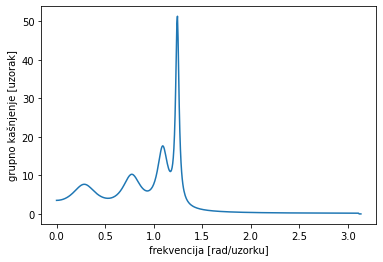

In [8]:
# Čebišovljev filtar prve vrste (tip I)
w, gd = group_delay((B_c1, A_c1));
oos_grpdelay(w, gd);

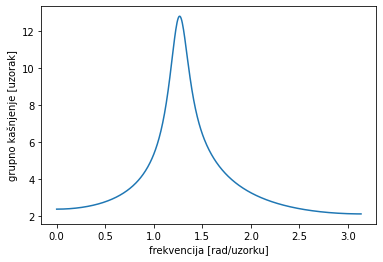

In [9]:
# Čebišovljev filtar druge vrste (tip II)
w, gd = group_delay((B_c2, A_c2));
oos_grpdelay(w, gd);

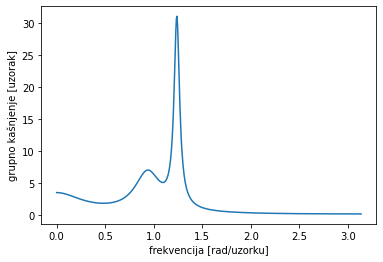

In [10]:
# Cauerov (eliptički) filtar
w, gd = group_delay((B_e, A_e));
oos_grpdelay(w, gd);

Uočite kako je ponašanje grupnog vremena kašnjenja najlošije (najgora odstupanja od konstante) u prijelaznom području.

Također, uočite da veći red filtra rezultira s većim grupnim vremenom kašnjenja, odnosno Butterworthov filtar reda oko $N=20$ uzrokuje kašnjenje od oko 10 uzoraka, dok eliptički filtar reda oko $N=5$ uzrokuje kašnjenje od oko 5 uzoraka, i to za istu filtarsku specifikaciju.

U slučaju da nismo zadovoljni s ostvarenom faznom karakteristikom i pripadnim grupnim vremenom kašnjenja onda možemo dizajnirati fazni korektor kojeg spajamo u kaskadu s dizajniranim filtrom. Dizajn faznog korektora nije tema ove vježbe.

## 1.A Dizajn nisko-propusnog IIR filtra korištenjem Cauerove (ili eliptičke) aproksimacije

Amplitudna specifikacija IIR filtra za ovaj zadatak jest: filtar mora biti nisko-propusni (NP) s jednolikom valovitošću u području propuštanja i u području gušenja. Prijelazno područje mora biti između frekvencija $\omega_1=0.2\pi$ i $\omega_2=0.3\pi$. Najveći dozvoljeni gubitak u području propuštanja je $R_P=0.1\,\text{dB}$, a najmanje dozvoljeno gušenje u području gušenja je $R_s=60\,\text{dB}$.

Napišite kod koji rješava sljedeće zadatke:

1. Nacrtajte amplitudnu specifikaciju navedenog filtra.
2. Odredite potreban red filtra i pripadnu graničnu frekvenciju (`ellipord`).
3. Izračunajte koeficijente prijenosne funkcije filtra (`ellip`).
4. Nacrtajte amplitudnu i faznu karakteristiku filtra.
5. Nacrtajte grupno kašnjenje filtra.
6. Nacrtajte položaj polova i nula.

Uputa: Nemojte zaboraviti normalizirati zadane granične frekvencije. Slobodno koristite kod kojeg ste pripremili u prošlim vježbama za crtanje položaja polova i nula. Svi grafovi moraju imati označene x i y os.

Po potrebi slobodno dodajte onoliko polja za upis koda koliko vam treba.

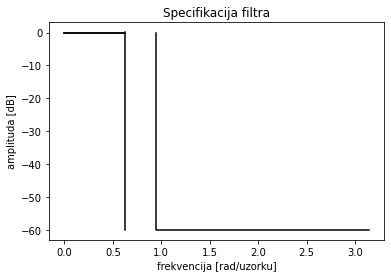

In [11]:
# Područje propuštanja zadajemo normaliziranom graničnom frekvencijom Wp i navjećim dozvoljenim gubitkom Rp u dB
Wp = 0.2;
Rp = 0.1;

# Područje gušenja zadajemo normaliziranom graničnom frekvencijom Ws i najmanjim dozvoljenim gušenjem Rs u dB
Ws = 0.3;
Rs = 60;

# 1. Nacrtaj amplitudnu specifikaciju kao horizontalne i vertikalne ograde 
figure(1);
oos_NP_spec(Wp, Ws, Rp, Rs);
title('Specifikacija filtra');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda [dB]');

In [12]:
# 2. Odredite potreban red filtra i pripadnu graničnu frekvenciju (ellipord).
# Dizajn filtra korištenjem Cauerove (eliptičke) aproksimacije
N_e, Wn_e = ellipord(Wp, Ws, Rp, Rs);
print(N_e)
print(Wn_e)

6
0.2


In [13]:
# 3. Izračunajte koeficijente prijenosne funkcije filtra (ellip).
# Dizajn filtra korištenjem Cauerove (eliptičke) aproksimacije
B_e, A_e = ellip(N_e, Rp, Rs, Wn_e);
print(B_e)
print(A_e)

[ 0.00363561 -0.00338293  0.00719445 -0.0035733   0.00719445 -0.00338293
  0.00363561]
[ 1.         -4.38564891  8.56454737 -9.4066214   6.09479144 -2.20164402
  0.34602757]


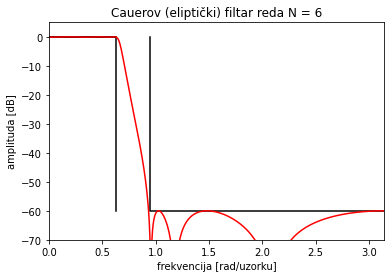

In [14]:
# 4. Nacrtaj amplitudnu karakterisitku
oos_amp_karak(B_e, A_e);
title('Cauerov (eliptički) filtar reda N = ' + str(N_e));

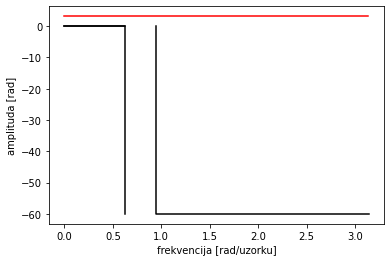

In [15]:
# 4. Nacrtaj faznu karakterisitku
oos_NP_spec(Wp, Ws, Rp, Rs);
W, H = freqz(B_e, A_e);
plot(W, unwrap(angle(20*log10(abs(H)))), 'r');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda [rad]');

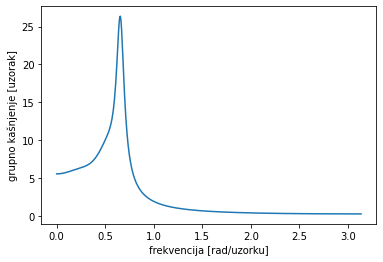

In [16]:
# 5. Nacrtajte grupno kašnjenje filtra.
# Cauerov (eliptički) filtar
w, gd = group_delay((B_e, A_e));
oos_grpdelay(w, gd);

Text(0, 0.5, 'Im')

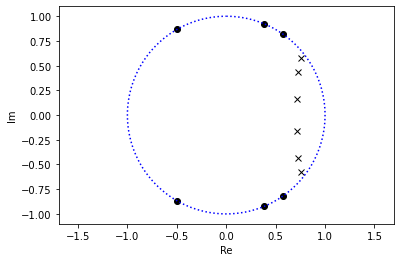

In [17]:
# 6. Nacrtajte položaj polova i nula.
poles = roots(A_e)
zeros = roots(B_e)
plot(poles.real, poles.imag, 'kx')
plot(zeros.real, zeros.imag, 'ko')
t = arange(0.0, 2*pi, 0.01)
plot(sin(t), cos(t), 'b:')
axis("equal")
xlabel("Re")
ylabel("Im")

## 1.B Dizajn pojasno-propusnog IIR filtra korištenjem Cauerove (ili eliptičke) aproksimacije

Amplitudna specifikacija IIR filtra za ovaj zadatak jest: filtar mora biti pojasno-propusni (PP) petog reda s jednolikom valovitošću u području propuštanja i u područjima gušenja. Granične frekvencije područja propuštanja su $\omega_1=0.3\pi$ i $\omega_2=0.4\pi$. Najveći dozvoljeni gubitak u području propuštanja je $R_P=2\,\text{dB}$, a najmanje dozvoljeno gušenje u području gušenja je $R_s=50\,\text{dB}$.

Napišite kod koji rješava sljedeće zadatke:

1. Nacrtajte amplitudnu specifikaciju navedenog filtra.
2. Odredite potreban red filtra i pripadnu graničnu frekvenciju (`ellipord`).
3. Izračunajte koeficijente prijenosne funkcije filtra (`ellip`).
4. Nacrtajte amplitudnu i faznu karakteristiku filtra.
5. Nacrtajte grupno kašnjenje filtra.
6. Nacrtajte položaj polova i nula.

Uputa: Nemojte zaboraviti normalizirati zadane granične frekvencije. Slobodno koristite kod kojeg ste pripremili u prošlim vježbama za crtanje položaja polova i nula.  Svi grafovi moraju imati označene x i y os.

Po potrebi slobodno dodajte onoliko polja za upis koda koliko vam treba.

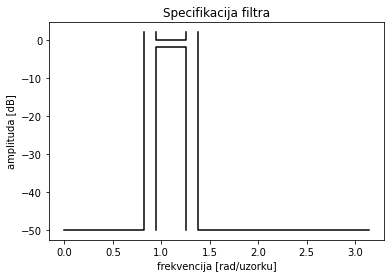

In [18]:
# 1. Nacrtajte amplitudnu specifikaciju navedenog filtra
Wp = 0.3
Rp = 2
wp = Wp-0.04

Ws = 0.4
Rs = 50
ws = Ws+0.04

def oos_NP_spec(Wp, Ws, Rp, Rs):
  plot([0, wp*pi, wp*pi], [-Rs, -Rs, Rp], 'k');
  plot([Wp*pi, Wp*pi, (Ws)*pi,(Ws)*pi], [Rp, 0, 0,Rp], 'k');
  plot([Wp*pi, Wp*pi, (Ws)*pi,(Ws)*pi], [-Rs, -Rp, -Rp,-Rs], 'k');
  plot([ws*pi, ws*pi, pi], [Rp, -Rs, -Rs], 'k');

figure(1);
oos_NP_spec(Wp, Ws, Rp, Rs);
title('Specifikacija filtra');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda [dB]');

In [19]:
# 2. Odredite potreban red filtra i pripadnu graničnu frekvenciju (ellipord)
N_e, Wn_e = ellipord([0.3, 0.4], [0.2, 0.5], Rp, Rs);
print(N_e)
print(Wn_e)

4
[0.3 0.4]


In [20]:
# 3. Izračunajte koeficijente prijenosne funkcije filtra (ellip)
B_e, A_e = ellip(N_e, Rp, Rs, Wn_e, 'bandpass');
print(B_e)
print(A_e)

[ 0.00433895 -0.01284513  0.02580963 -0.03625272  0.04165746 -0.03625272
  0.02580963 -0.01284513  0.00433895]
[  1.          -3.52897456   8.36899637 -12.61061927  14.58455283
 -11.92797137   7.48725284  -2.98464277   0.80008334]


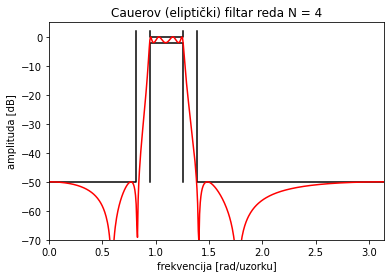

In [21]:
# 4. Nacrtajte amplitudnu karakteristiku filtra
oos_amp_karak(B_e, A_e);
title('Cauerov (eliptički) filtar reda N = ' + str(N_e));

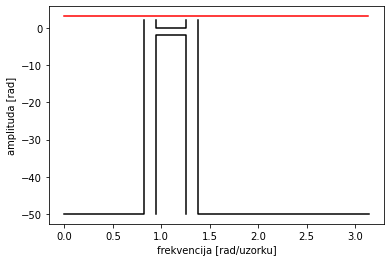

In [22]:
# 4. Nacrtajte faznu karakteristiku filtra
oos_NP_spec(Wp, Ws, Rp, Rs);
W, H = freqz(B_e, A_e);
plot(W, unwrap(angle(20*log10(abs(H)))), 'r');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda [rad]');

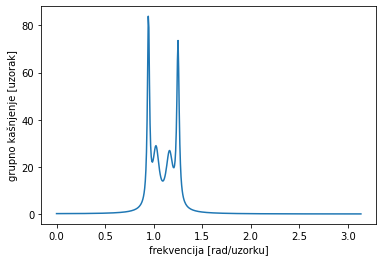

In [23]:
# 5. Nacrtajte grupno kašnjenje filtra
# Cauerov (eliptički) filtar
w, gd = group_delay((B_e, A_e));
oos_grpdelay(w, gd);

Text(0, 0.5, 'Im')

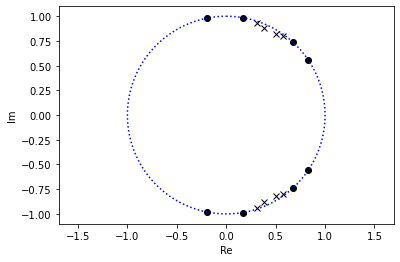

In [24]:
# 6. Nacrtajte položaj polova i nula
poles = roots(A_e)
zeros = roots(B_e)
plot(poles.real, poles.imag, 'kx')
plot(zeros.real, zeros.imag, 'ko')
t = arange(0.0, 2*pi, 0.01)
plot(sin(t), cos(t), 'b:')
axis("equal")
xlabel("Re")
ylabel("Im")

Postoji mogućnost ispitivanja ponašanje stvarnih realizacija dva filtra koja ste ovdje dizajnirali u laboratoriju korištenjem ADSP-2181 EZ-KIT evaluacijskog kita. Ta mogućnost nije obvezna i ovisi o zauzetosti laboratorija i dostupnosti opreme. Ako ste zainteresirani za takvu provjeru onda kontaktirajte vašeg nastavnika.